### Complete Text Processing for Beginners 

Watch Full Video: https://youtu.be/VyDmQggfsZ0

Dataset: https://www.kaggle.com/kazanova/sentiment140/data#

In [ ]:
# pip install -U spacy
# pip install -U spacy-lookups-data
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

#### General Feature Extraction
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts

#### Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of `RT`
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt `Sentiment Classifier`

#### Advanced Text Processing and Feature Extraction
- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation `TF`
- Inverse Document Frequency `IDF`
- `TFIDF` Term Frequency - Inverse Document Frequency
- Word Embedding `Word2Vec` using SpaCy

#### Machine Learning Models for Text Classification
- SGDClassifier
- LogisticRegression
- LogisticRegressionCV
- LinearSVC
- RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


In [3]:
df = pd.read_csv('twitter16m.csv', encoding = 'latin1', header = None)

In [4]:
df.head()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [5]:
df = df[[5, 0]]

In [6]:
df.columns = ['twitts', 'sentiment']
df.head()

twitts  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1  is upset that he can't update his Facebook by ...          0
2  @Kenichan I dived many times for the ball. Man...          0
3    my whole body feels itchy and like its on fire           0
4  @nationwideclass no, it's not behaving at all....          0

In [7]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [8]:
sent_map = {0: 'negative', 4: 'positive'}

### Word Counts 

In [10]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [11]:
df.head()

twitts  sentiment  word_counts
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19
1  is upset that he can't update his Facebook by ...          0           21
2  @Kenichan I dived many times for the ball. Man...          0           18
3    my whole body feels itchy and like its on fire           0           10
4  @nationwideclass no, it's not behaving at all....          0           21

### Characters Count 

In [12]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

In [13]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  
0          115  
1          111  
2           89  
3           47  
4          111

### Average Word Length 

In [14]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [15]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [17]:
len('this is nlp lesson')/4

4.5

In [18]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  
0          115      5.052632  
1          111      4.285714  
2           89      3.944444  
3           47      3.700000  
4          111      4.285714

In [19]:
115/19

6.052631578947368

### Stop Words Count 

In [20]:
print(STOP_WORDS)

{'one', 'up', 'further', 'herself', 'nevertheless', 'their', 'when', 'a', 'bottom', 'both', 'also', 'i', 'sometime', 'ours', "'d", 'him', 'together', 'former', 'hereafter', 'whereby', "'ll", 'three', 'same', 'is', 'say', 'hers', 'must', 'five', 'you', 'across', 'n‘t', 'mostly', 'into', 'am', 'myself', 'something', 'could', 'being', 'seems', 'go', 'only', 'fifteen', 'either', 'us', 'than', 'latter', 'so', 'after', 'name', 'there', 'that', 'next', 'even', 'without', 'along', 'behind', 'very', 'whereas', 'off', 'herein', 'although', 'such', 'themselves', 'then', 'in', 'under', 'of', 'onto', 'really', 'due', 'otherwise', 'give', 'yourself', 'indeed', 'my', 'mine', 'show', 'via', 'elsewhere', 'be', 'just', 'thence', 'them', 'beside', 'though', 'as', 'out', 'third', 'however', 'twelve', 'except', '‘d', 'anything', 'move', 'side', 'everything', 'all', 'towards', 'whatever', 'will', 'n’t', 'toward', 'keep', 'hereupon', 'might', 'no', 'own', 'itself', 'for', 'can', 'rather', 'whether', 'while',

In [22]:
x = 'this is text data'

In [23]:
x.split()

['this', 'is', 'text', 'data']

In [25]:
len([t for t in x.split() if t in STOP_WORDS])


2

In [26]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [27]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  
0          115      5.052632               4  
1          111      4.285714               9  
2           89      3.944444               7  
3           47      3.700000               5  
4          111      4.285714              10

### Count #HashTags and @Mentions 

In [29]:
x = 'this #hashtag and this is @mention'
# x = x.split()
# x

In [31]:
[t for t in x.split() if t.startswith('@')]
    

['@mention']

In [32]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [33]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  
0          115      5.052632               4               0               1  
1          111      4.285714               9               0               0  
2           89      3.944444               7               0               1  
3           47      3.700000               5               0               0  
4          111      4.285714              10               0               1

### if numeric digits are present in twitts 

In [34]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [35]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  
0               0  
1               0  
2               0  
3               0  
4               0

### UPPER case words count

In [36]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [37]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts  
0               0             1  
1               0             0  
2               0             1  
3               0             0  
4               0             1

In [38]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## Preprocessing and Cleaning 

### Lower case conversion 

In [39]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [41]:
df.head(2)

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - awww, t...          0           19   
1  is upset that he can't update his facebook by ...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   

   numerics_count  upper_counts  
0               0             1  
1               0             0

### Contraction to Expansion 

In [ ]:
x = "i don't know what you want, can't, he'll, i'd"

In [49]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [50]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [53]:
x = "hi, i'd be happy"

In [54]:
cont_to_exp(x)

'hi, i would be happy'

In [55]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 52.7 s


In [56]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - awww, t...          0           19   
1  is upset that he cannot update his facebook by...          0           21   
2  @kenichan i dived many times for the ball. man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it is not behaving at all...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts  
0               0             1  
1               0             0  
2               0             1  
3               0             0  
4               0             1

### Count and Remove Emails 

In [57]:
import re

In [60]:
x = 'hi my email me at email@email.com another@email.com'

In [61]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

['email@email.com', 'another@email.com']

In [62]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [63]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [65]:
df[df['emails_count']>0].head()

twitts  sentiment  \
4054   i want a new laptop.  hp tx2000 is the bomb. :...          0   
7917                     who stole elledell@gmail.com?            0   
8496   @alexistehpom  really? did you send out all th...          0   
10290  @laureystack awh...that is kinda sad  lol add ...          0   
16413  @jilliancyork  got 2 bottom of it, human error...          0   

       word_counts  char_counts  avg_word_len  stop_words_len  hashtags_count  \
4054            20          103      4.150000               6               0   
7917             3           31      9.000000               1               0   
8496            20          130      5.500000              11               0   
10290            8           76      8.500000               0               0   
16413           21          137      5.428571               7               0   

       mentions_count  numerics_count  upper_counts  \
4054                0               0             4   
7917                0               0             0   
8496                1               0             0   
10290               1               0             0   
16413               1               1             0   

                             emails  emails_count  
4054       [gabbehhramos@yahoo.com]             1  
7917           [elledell@gmail.com]             1  
8496         [missataari@gmail.com]             1  
10290  [hello.kitty.65@hotmail.com]             1  
16413          [press@linkedin.com]             1

In [67]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

'hi my email me at  '

In [68]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [69]:
df[df['emails_count']>0].head()

twitts  sentiment  \
4054   i want a new laptop.  hp tx2000 is the bomb. :...          0   
7917                                       who stole ?            0   
8496   @alexistehpom  really? did you send out all th...          0   
10290  @laureystack awh...that is kinda sad  lol add ...          0   
16413  @jilliancyork  got 2 bottom of it, human error...          0   

       word_counts  char_counts  avg_word_len  stop_words_len  hashtags_count  \
4054            20          103      4.150000               6               0   
7917             3           31      9.000000               1               0   
8496            20          130      5.500000              11               0   
10290            8           76      8.500000               0               0   
16413           21          137      5.428571               7               0   

       mentions_count  numerics_count  upper_counts  \
4054                0               0             4   
7917                0               0             0   
8496                1               0             0   
10290               1               0             0   
16413               1               1             0   

                             emails  emails_count  
4054       [gabbehhramos@yahoo.com]             1  
7917           [elledell@gmail.com]             1  
8496         [missataari@gmail.com]             1  
10290  [hello.kitty.65@hotmail.com]             1  
16413          [press@linkedin.com]             1

### Count URLs and Remove it 

In [70]:
x = 'hi, to watch more visit https://youtube.com/kgptalkie'

In [71]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [72]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [76]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

'hi, to watch more visit '

In [77]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))

In [78]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot  - awww, that is a bummer.  you sh...          0           19   
1  is upset that he cannot update his facebook by...          0           21   
2  @kenichan i dived many times for the ball. man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it is not behaving at all...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts emails  emails_count  urls_flag  
0               0             1     []             0          1  
1               0             0     []             0          0  
2               0             1     []             0          0  
3               0             0     []             0          0  
4               0             1     []             0          0

In [79]:
df.loc[0]['twitts']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### Remove RT  

In [80]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

### Special Chars removal or punctuation removal 

In [82]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [83]:
df.head()

twitts  sentiment  word_counts  \
0  switchfoot  - awww that is a bummer  you shoul...          0           19   
1  is upset that he cannot update his facebook by...          0           21   
2  kenichan i dived many times for the ball manag...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  nationwideclass no it is not behaving at all i...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts emails  emails_count  urls_flag  
0               0             1     []             0          1  
1               0             0     []             0          0  
2               0             1     []             0          0  
3               0             0     []             0          0  
4               0             1     []             0          0

### Remove multiple spaces `"hi   hello    "`

In [85]:
x = 'thanks    for    watching and    please    like this video'

In [86]:
" ".join(x.split())

'thanks for watching and please like this video'

In [87]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [88]:
df.head(2)

twitts  sentiment  word_counts  \
0  switchfoot - awww that is a bummer you shoulda...          0           19   
1  is upset that he cannot update his facebook by...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   

   numerics_count  upper_counts emails  emails_count  urls_flag  
0               0             1     []             0          1  
1               0             0     []             0          0

### Remove HTML tags 

In [93]:
from bs4 import BeautifulSoup

In [90]:
x = '<html><h2>Thanks for watching</h2></html>'

In [94]:
BeautifulSoup(x, 'lxml').get_text()

'Thanks for watching'

In [95]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

Wall time: 11min 37s


### Remove Accented Chars 

In [99]:
import unicodedata

In [100]:
x = 'Áccěntěd těxt'

In [101]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [102]:
remove_accented_chars(x)

'Accented text'

### SpaCy and NLP 

### Remove Stop Words 

In [103]:
import spacy

In [106]:
x = 'this is stop words removal code is a the an how what'

In [107]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [108]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [109]:
df.head()

twitts  sentiment  word_counts  \
0  switchfoot - awww bummer shoulda got david car...          0           19   
1  upset update facebook texting cry result schoo...          0           21   
2  kenichan dived times ball managed save 50 rest...          0           18   
3                         body feels itchy like fire          0           10   
4                       nationwideclass behaving mad          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts emails  emails_count  urls_flag  
0               0             1     []             0          1  
1               0             0     []             0          0  
2               0             1     []             0          0  
3               0             0     []             0          0  
4               0             1     []             0          0

### Convert into base or root form of word 

In [110]:
nlp = spacy.load('en_core_web_sm')

In [122]:
x = 'kenichan dived times ball managed save 50 rest'

In [123]:
# dive = dived, time = times, manage = managed

In [124]:
# x = 'i you he she they is am are'

In [125]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        

In [126]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


### Common words removal 

In [129]:
' '.join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [130]:
text = ' '.join(df['twitts'])

In [131]:
text = text.split()

In [132]:
freq_comm = pd.Series(text).value_counts()

In [135]:
f20 = freq_comm[:20]

In [136]:
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
home      39168
dtype: int64

In [138]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

### Rare words removal 

In [140]:
rare20 = freq_comm[-20:]

In [141]:
rare20

veru              1
80-90f            1
refrigerant       1
demaisss          1
knittingsci-fi    1
wendireed         1
danielletuazon    1
chacha8           1
a-zquot           1
krustythecat      1
westmount         1
-appreciate       1
motocycle         1
madamhow          1
felspoon          1
fastbloke         1
900pmno           1
nxec              1
laassssttt        1
update-uri        1
dtype: int64

In [142]:
rare = freq_comm[freq_comm.values == 1]

In [143]:
rare

mamat             1
fiive             1
music-festival    1
leenahyena        1
11517             1
                 ..
fastbloke         1
900pmno           1
nxec              1
laassssttt        1
update-uri        1
Length: 536196, dtype: int64

In [145]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [146]:
df.head()

twitts  sentiment  word_counts  \
0        switchfoot awww bummer shoulda david carr d          0           19   
1  upset update facebook texting cry result schoo...          0           21   
2  kenichan dived times ball managed save 50 rest...          0           18   
3                              body feels itchy fire          0           10   
4                       nationwideclass behaving mad          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  mentions_count  \
0          115      5.052632               4               0               1   
1          111      4.285714               9               0               0   
2           89      3.944444               7               0               1   
3           47      3.700000               5               0               0   
4          111      4.285714              10               0               1   

   numerics_count  upper_counts emails  emails_count  urls_flag  
0               0             1     []             0          1  
1               0             0     []             0          0  
2               0             1     []             0          0  
3               0             0     []             0          0  
4               0             1     []             0          0

### Word Cloud Visualization 

In [148]:
# !pip install wordcloud

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
x = ' '.join(text[:20000])

In [155]:
len(text)

10837079

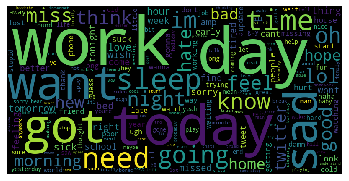

In [156]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### Spelling Correction 

In [158]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [159]:
from textblob import TextBlob

In [169]:
x = 'tanks forr waching this vidio carri'

In [170]:
x = TextBlob(x).correct()


In [171]:
x

TextBlob("tanks for watching this video carry")

### Tokenization 

In [177]:
x = 'thanks#watching this video. please like it'

In [178]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [179]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


### Lemmatization 

In [181]:
x = 'runs run running ran'

In [182]:
from textblob import Word

In [183]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [184]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### Detect Entities using NER of SpaCy 

In [186]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [187]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [188]:
from spacy import displacy

In [189]:
displacy.render(doc, style = 'ent')

### Detecting Nouns 

In [190]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [191]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


### Translation and Language Detection 

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [195]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [193]:
tb = TextBlob(x)

In [194]:
tb.detect_language()

'en'

In [200]:
tb.translate(to='bn')

TextBlob("ব্রেকিং নিউজ: যুক্তরাষ্ট্রের রাষ্ট্রপতি ডোনাল্ড ট্রাম্প চাঁদটি খনির জন্য একটি চুক্তিতে সই করতে চাইছেন")

### Use inbuilt sentiment classifier 

In [201]:
from textblob.sentiments import NaiveBayesAnalyzer

In [202]:
x = 'we all stands together to fight with corona virus. we will win together'

In [203]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [204]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [205]:
x = 'we all are sufering from corona'

In [206]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [207]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.75616044472398, p_neg=0.2438395552760203)

## Advanced Text Processing 

### N-Grams 

In [208]:
x = 'thanks for watching'

In [209]:
tb = TextBlob(x)

In [215]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

### Bag of Words `BoW` 

In [229]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [230]:
from sklearn.feature_extraction.text import CountVectorizer

In [231]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [232]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [233]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [247]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

In [248]:
bow

first  is  last  second  sentence  this
0      1   2     0       0         1     2
1      0   1     0       1         0     1
2      0   1     1       0         0     1

In [249]:
x

['this is first sentence this is', 'this is second', 'this is last']

### Term Frequency 

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [250]:
x

['this is first sentence this is', 'this is second', 'this is last']

In [251]:
bow

first  is  last  second  sentence  this
0      1   2     0       0         1     2
1      0   1     0       1         0     1
2      0   1     1       0         0     1

In [252]:
bow.shape

(3, 6)

In [253]:
tf = bow.copy()

In [254]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [255]:
tf

first        is      last    second  sentence      this
0  0.166667  0.333333  0.000000  0.000000  0.166667  0.333333
1  0.000000  0.333333  0.000000  0.333333  0.000000  0.333333
2  0.000000  0.333333  0.333333  0.000000  0.000000  0.333333

### Inverse Document Frequency IDF

idf = log( (1 + N)/(n + 1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [256]:
import numpy as np

In [257]:
x_df = pd.DataFrame(x, columns=['words'])

In [258]:
x_df

words
0  this is first sentence this is
1                  this is second
2                    this is last

In [259]:
bow

first  is  last  second  sentence  this
0      1   2     0       0         1     2
1      0   1     0       1         0     1
2      0   1     1       0         0     1

In [260]:
N = bow.shape[0]
N

3

In [261]:
bb = bow.astype('bool')
bb

first    is   last  second  sentence  this
0   True  True  False   False      True  True
1  False  True  False    True     False  True
2  False  True   True   False     False  True

In [263]:
bb['is'].sum()

3

In [264]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [269]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [270]:
nz

[1, 3, 1, 1, 1, 3]

In [271]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [272]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [273]:
bow

first  is  last  second  sentence  this
0      1   2     0       0         1     2
1      0   1     0       1         0     1
2      0   1     1       0         0     1

### TFIDF 

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [275]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [277]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [278]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [279]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word Embeddings 

#### SpaCy `Word2Vec` 

In [280]:
# !python -m spacy download en_core_web_lg

In [281]:
nlp = spacy.load('en_core_web_lg')

In [286]:
doc = nlp('thank you! dog cat lion dfasaa')

In [287]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [290]:
token.vector.shape

(300,)

In [292]:
nlp('cat').vector.shape

(300,)

In [293]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


thank dfasaa 0.0

you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


you dfasaa 0.0

! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


! dfasaa 0.0

dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dog dfasaa 0.0

cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


cat dfasaa 0.0

lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


lion dfasaa 0.0



C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa thank 0.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa you 0.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa ! 0.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa dog 0.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa cat 0.0


C:\ProgramData\Anaconda3\lib\runpy.py:193: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  "__main__", mod_spec)


dfasaa lion 0.0
dfasaa dfasaa 1.0



## Machine Learning Models for Text Classification

### BoW

In [295]:
df.shape

(1600000, 13)

In [298]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [299]:
dfr = df0.append(df4)

In [300]:
dfr.shape

(4000, 13)

In [331]:
dfr_feat = dfr.drop(labels=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True)

In [332]:
dfr_feat

word_counts  char_counts  avg_word_len  stop_words_len  hashtags_count  \
0              15           81      4.400000               6               0   
1               8           47      4.875000               4               0   
2              15           69      3.600000               6               0   
3               9           42      3.666667               4               0   
4              14           77      4.500000               5               0   
...           ...          ...           ...             ...             ...   
3995            3           33      9.666667               1               0   
3996           16           78      3.875000               4               0   
3997           27          134      3.962963               9               0   
3998            6           44      6.333333               0               0   
3999            5           25      4.000000               3               0   

      mentions_count  numerics_count  upper_counts  emails_count  urls_flag  
0                  0               0             0             0          0  
1                  1               0             0             0          0  
2                  1               0             0             0          0  
3                  0               0             2             0          0  
4                  0               0             0             0          0  
...              ...             ...           ...           ...        ...  
3995               1               0             0             0          0  
3996               1               0             2             0          0  
3997               1               0             2             0          0  
3998               1               1             1             0          0  
3999               1               0             0             0          0  

[4000 rows x 10 columns]

In [305]:
y = dfr['sentiment']

In [307]:
from sklearn.feature_extraction.text import CountVectorizer

In [308]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [311]:
text_counts.toarray().shape

(4000, 9750)

In [321]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [322]:
dfr_bow.head(2)

007peter  05  060594  09  10  100  1000  10000000000000000000000000000  \
0         0   0       0   0   0    0     0                              0   
1         0   0       0   0   0    0     0                              0   

   1038  1041  ...  zomg  zonked  zoo  zooey  zrovna  zshare  zsk  zwel  zzz  \
0     0     0  ...     0       0    0      0       0       0    0     0    0   
1     0     0  ...     0       0    0      0       0       0    0     0    0   

   zzzzz  
0      0  
1      0  

[2 rows x 9750 columns]

### ML Algorithms 

In [316]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [317]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [318]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [319]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [320]:
def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [323]:
%%time
classify(dfr_bow, y)

SGD  --->  0.62375
LGR  --->  0.65375
LGR-CV  --->  0.6525
SVM  --->  0.6325
RFC  --->  0.6525
Wall time: 1min 42s


##### Manual Feature

In [325]:
dfr_feat.head(2)

word_counts  char_counts  avg_word_len  stop_words_len  \
453843           15           81         4.400               6   
388280            8           47         4.875               4   

        hashtags_count  mentions_count  numerics_count  upper_counts  \
453843               0               0               0             0   
388280               0               1               0             0   

        emails_count  urls_flag  
453843             0          0  
388280             0          0

In [326]:
%%time
classify(dfr_feat, y)

SGD  --->  0.64125
LGR  --->  0.645
LGR-CV  --->  0.65
SVM  --->  0.6475
RFC  --->  0.5675
Wall time: 1.35 s


##### Manual + Bow 

In [334]:
X = dfr_feat.join(dfr_bow)

In [335]:
%%time
classify(X, y)

SGD  --->  0.64875
LGR  --->  0.67125
LGR-CV  --->  0.66125
SVM  --->  0.64375
RFC  --->  0.705
Wall time: 1min 18s


#### TFIDF

In [336]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [337]:
dfr.shape

(4000, 13)

In [338]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['twitts'])

In [341]:
%%time
classify(pd.DataFrame(X.toarray()), y)

SGD  --->  0.635
LGR  --->  0.65125
LGR-CV  --->  0.6475
SVM  --->  0.63875
RFC  --->  0.6425
Wall time: 1min 37s


### Word2Vec 

In [342]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1, -1)

In [343]:
%%time
dfr['vec'] = dfr['twitts'].apply(lambda x: get_vec(x))

Wall time: 51.8 s


In [344]:
X = np.concatenate(dfr['vec'].to_numpy(), axis = 0)

In [345]:
X.shape

(4000, 300)

In [346]:
classify(pd.DataFrame(X), y)

SGD  --->  0.5925
LGR  --->  0.70625
LGR-CV  --->  0.69375


C:\Users\Laxmi\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM  --->  0.70125
RFC  --->  0.66625


In [347]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, "-->", y_pred)

In [349]:
predict_w2v('hi, thanks for watching this video. please like and subscribe')

SGD --> [0]
LGR --> [4]
LGR-CV --> [0]
SVM --> [4]
RFC --> [0]


In [350]:
predict_w2v('please let me know if you want more video')

SGD --> [0]
LGR --> [0]
LGR-CV --> [0]
SVM --> [0]
RFC --> [0]


In [355]:
predict_w2v('congratulation looking good congrats')

SGD --> [4]
LGR --> [4]
LGR-CV --> [4]
SVM --> [4]
RFC --> [0]
